# 🎯👁️ Object Detection - Using YOLO

In [1]:
# pip install ultralytics

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


In [3]:
# 🔹 Load pre-trained YOLOv8 model
model = YOLO("yolov8n.pt")

In [4]:
!ls '/media/akashs/FA22E72622E6E69B/DATA1_disk/ACADEMICS/3_IPCS_Works/data/yolo/'

classroom.jpg  face.jpg  ship.jpg  traffic2.jpg  traffic.jpg


In [5]:
image_path = '/media/akashs/FA22E72622E6E69B/DATA1_disk/ACADEMICS/3_IPCS_Works/data/yolo/traffic2.jpg'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [6]:
results = model(img_rgb)

/home/akashs/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:128: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


0: 480x640 6 cars, 4 buss, 2 trucks, 210.4ms
Speed: 7.0ms preprocess, 210.4ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


In [7]:
# 🔹 Extract results
boxes = results[0].boxes
names = model.names  # COCO class names

In [8]:
# 🔹 Draw results on the image
for box in boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])  # bounding box
    conf = box.conf[0].item()
    cls = int(box.cls[0].item())
    label = f"{names[cls]}: {conf:.2f}"

    # Draw rectangle and label
    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(img_rgb, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX,
                0.6, (255, 0, 0), 2)

    print(f"🟢 Detected: {label} at ({x1}, {y1}, {x2}, {y2})")

🟢 Detected: car: 0.88 at (36, 584, 352, 859)
🟢 Detected: car: 0.83 at (2, 331, 197, 512)
🟢 Detected: truck: 0.75 at (738, 106, 1175, 748)
🟢 Detected: bus: 0.74 at (344, 208, 497, 380)
🟢 Detected: car: 0.72 at (657, 246, 760, 395)
🟢 Detected: bus: 0.68 at (196, 231, 331, 369)
🟢 Detected: truck: 0.43 at (310, 341, 593, 717)
🟢 Detected: car: 0.42 at (309, 338, 593, 720)
🟢 Detected: car: 0.36 at (319, 275, 348, 340)
🟢 Detected: car: 0.36 at (22, 272, 133, 342)
🟢 Detected: bus: 0.33 at (139, 248, 205, 352)
🟢 Detected: bus: 0.29 at (140, 234, 331, 370)


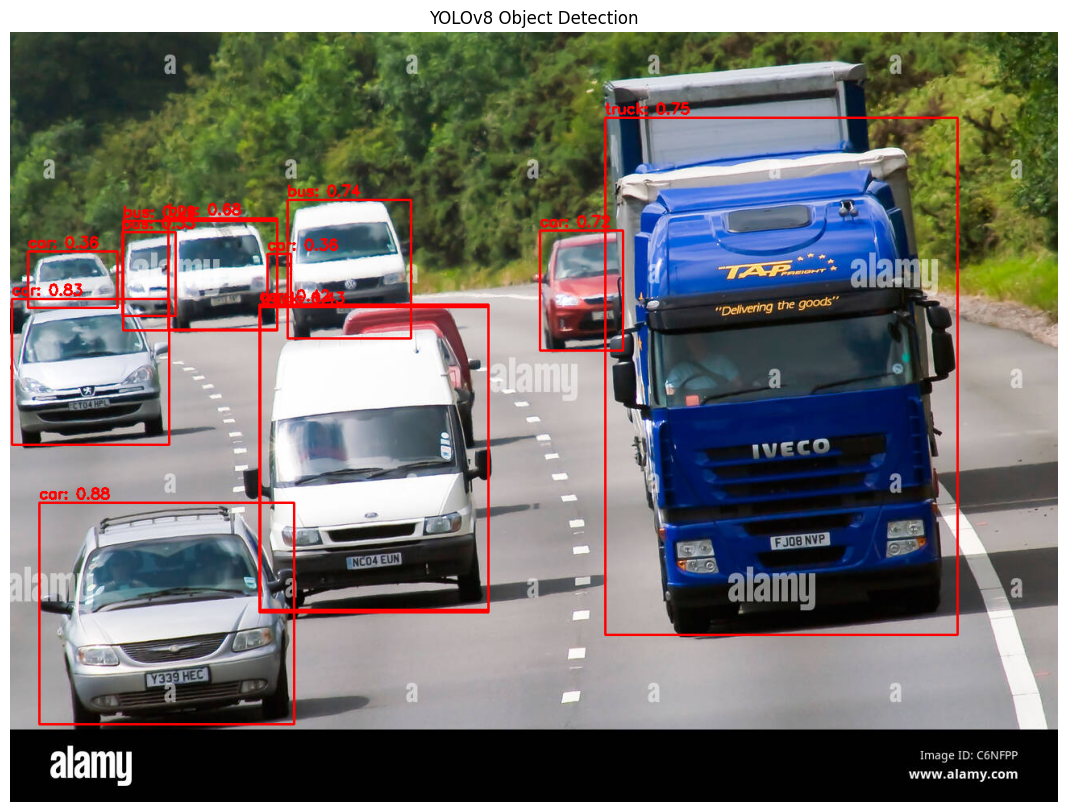

In [9]:
# 🔹 Show final image
plt.figure(figsize=(20, 10))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("YOLOv8 Object Detection")
plt.show()